In [7]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.arima.model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/windows/proga/global_mfdexport_1month_18072010_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH','<TICKER>':'TICKER'})\
    .drop(['<PER>','<TIME>','<OPENINT>'],1)
df.DATE = pd.to_datetime(df.DATE,format="%Y%m%d")

/tmp/ipykernel_5639/3408492359.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>'],1)


In [5]:
companies = df['TICKER'].unique()

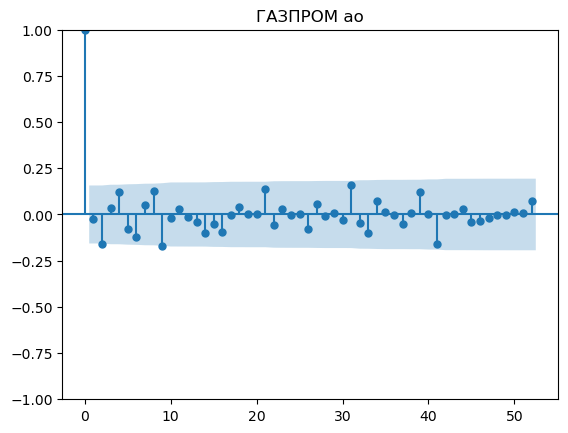

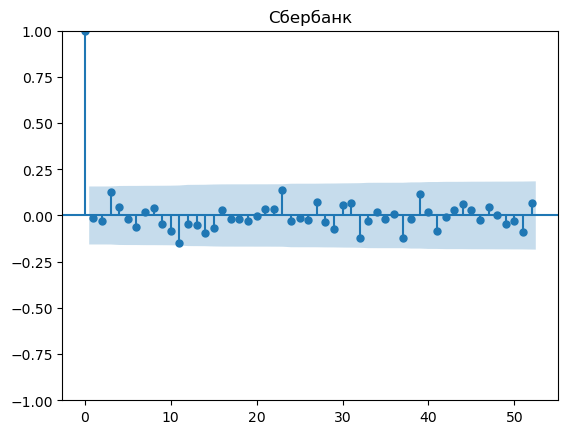

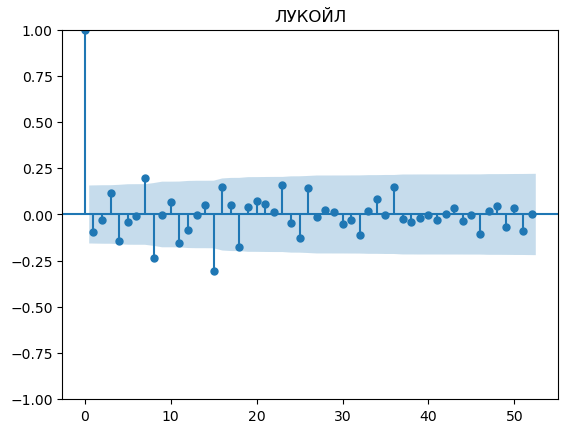

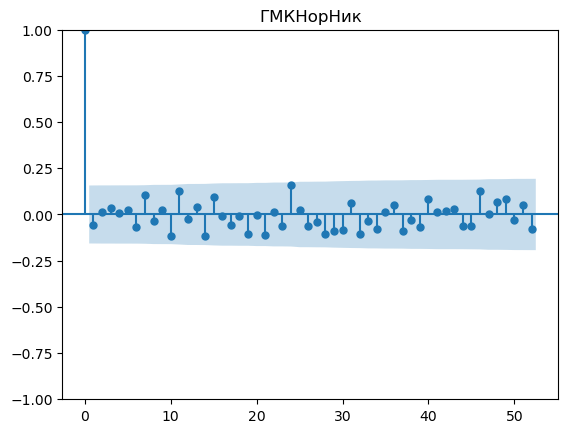

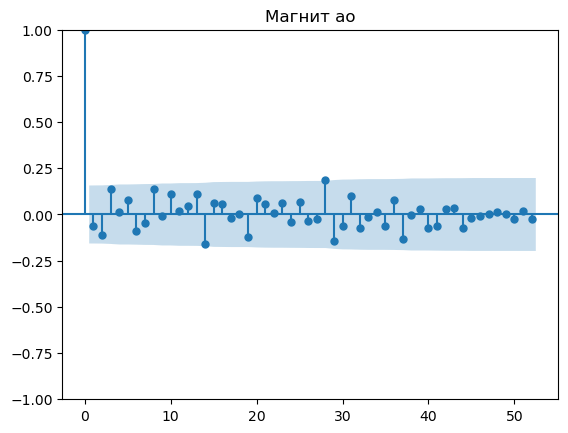

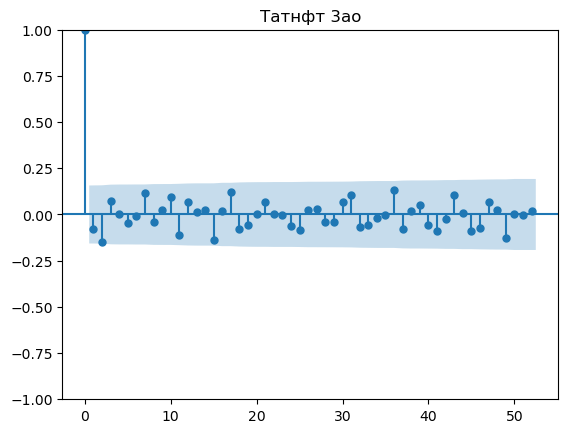

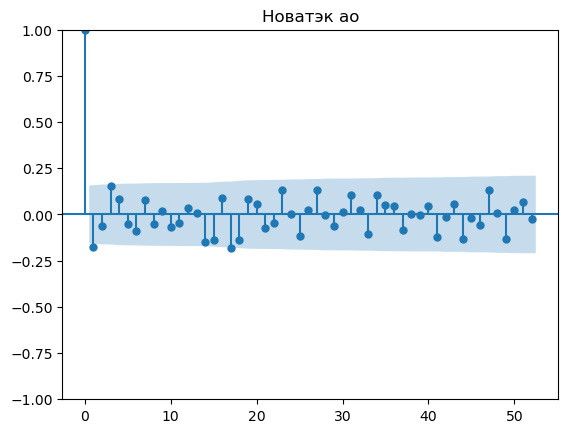

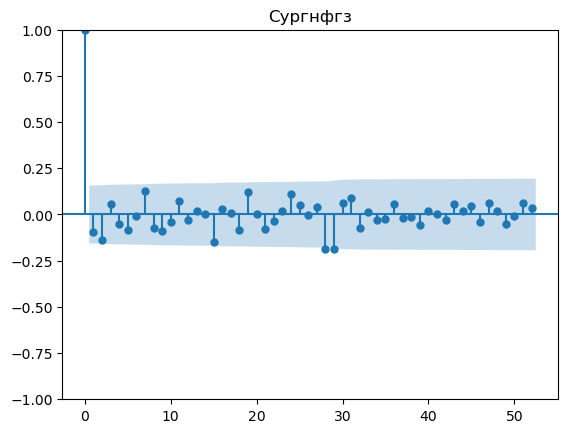

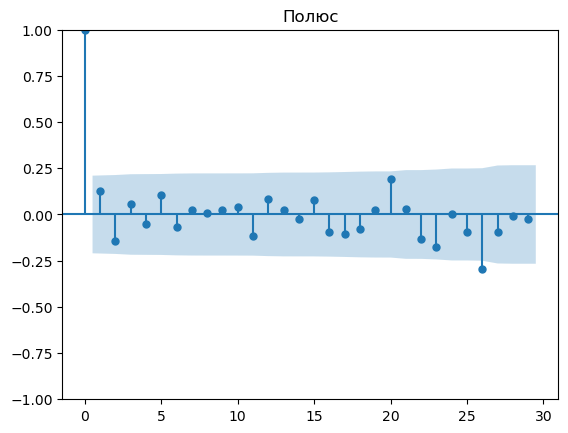

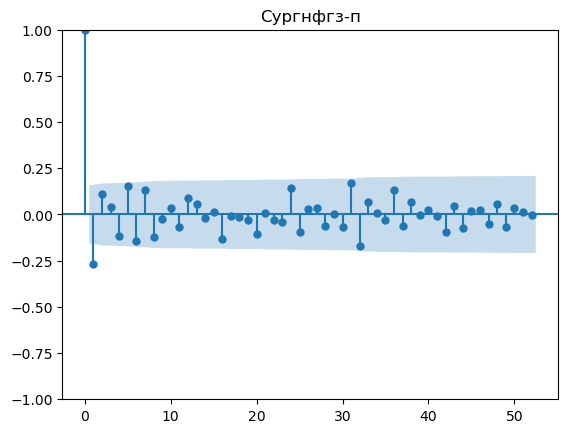

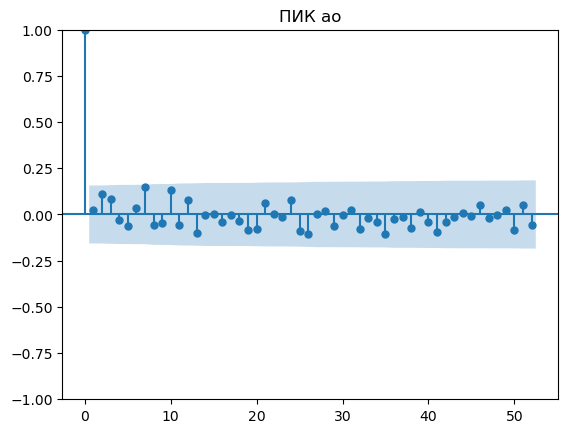

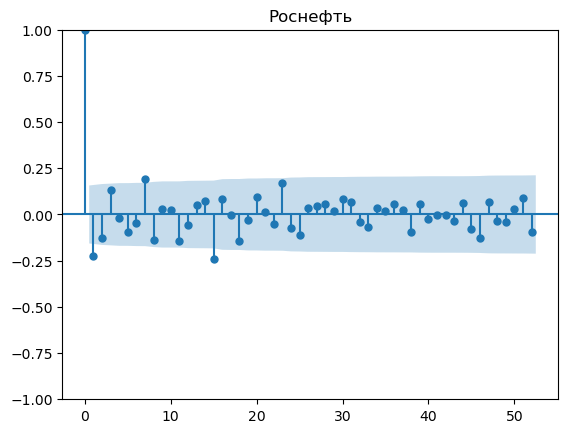

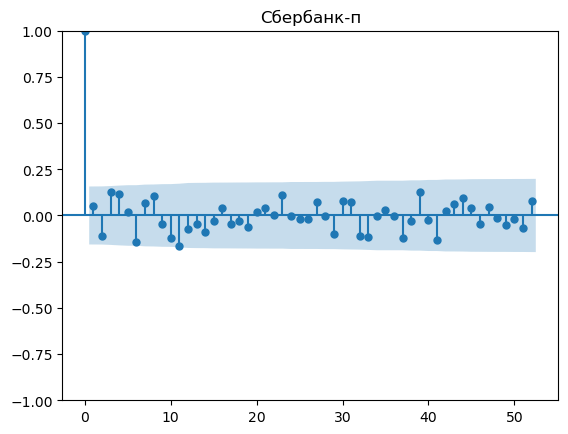

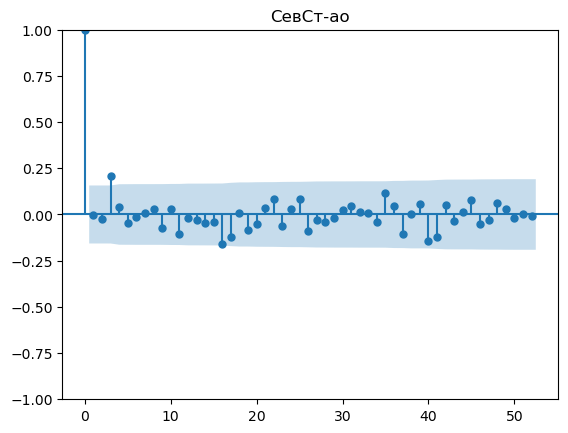

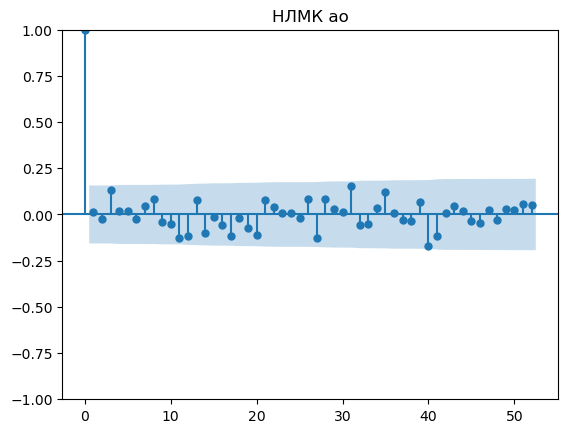

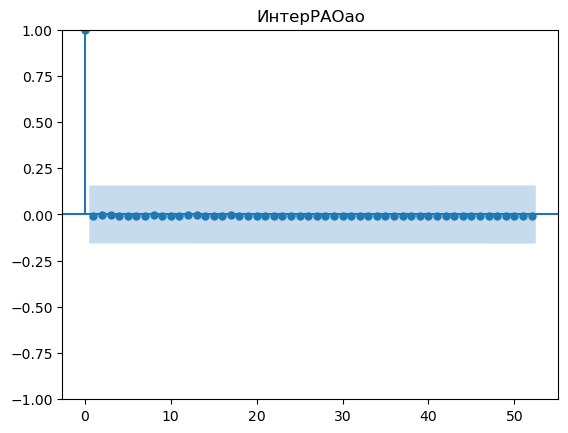

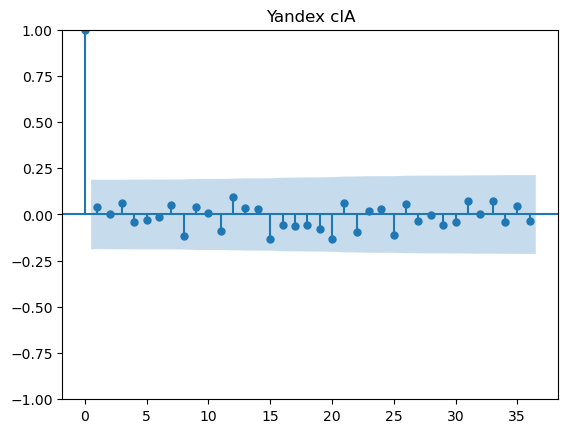

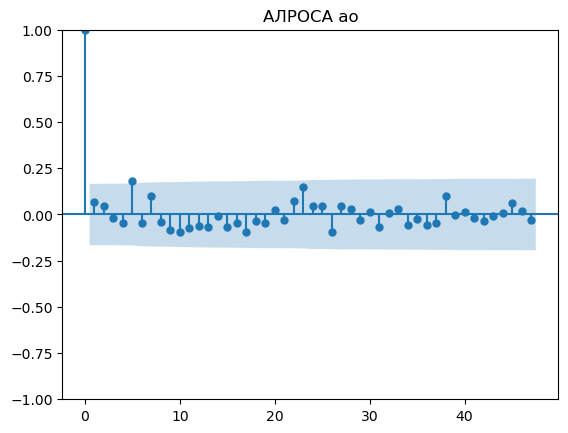

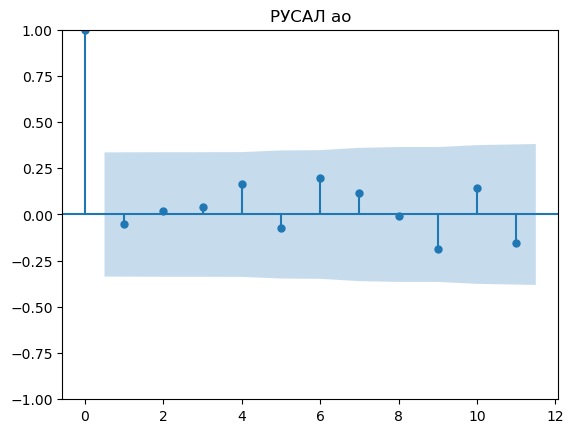

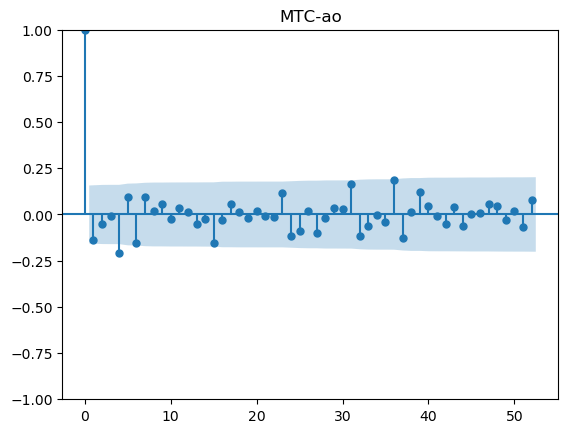

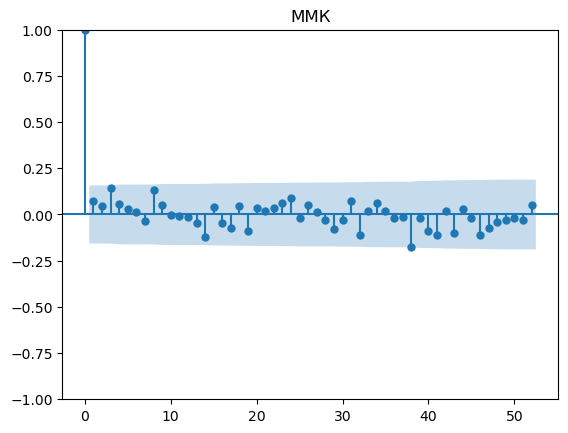

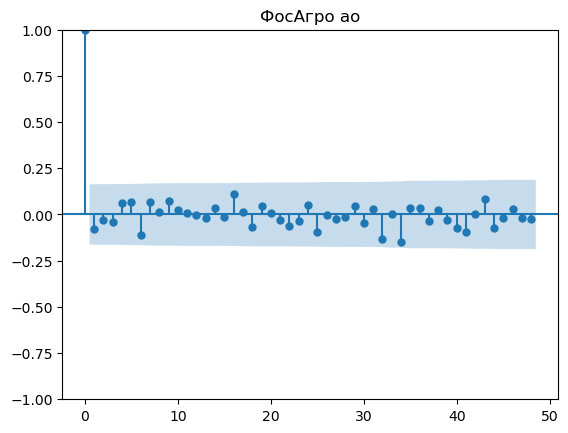

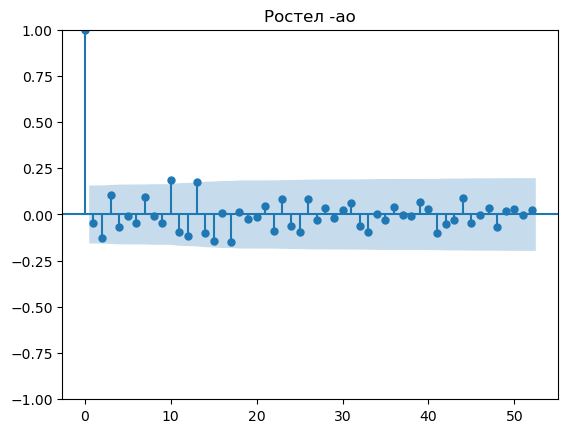

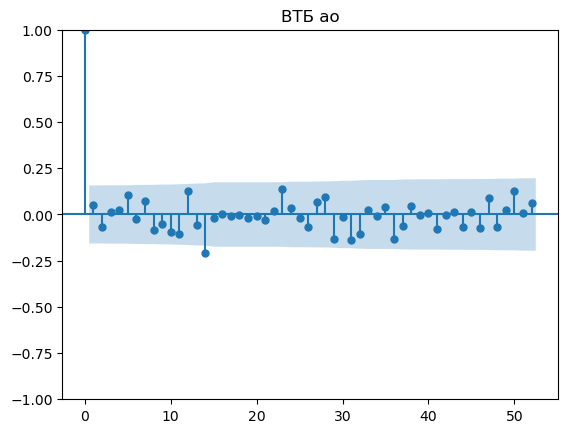

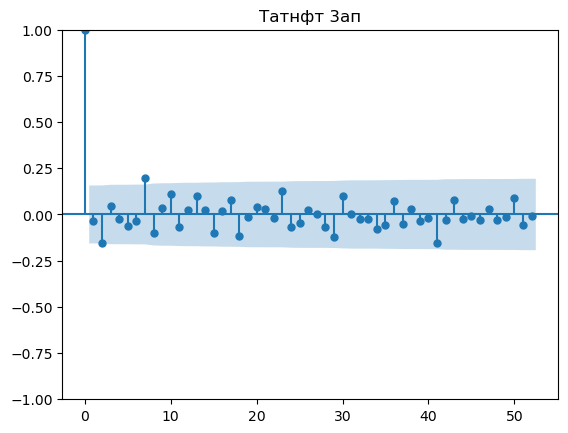

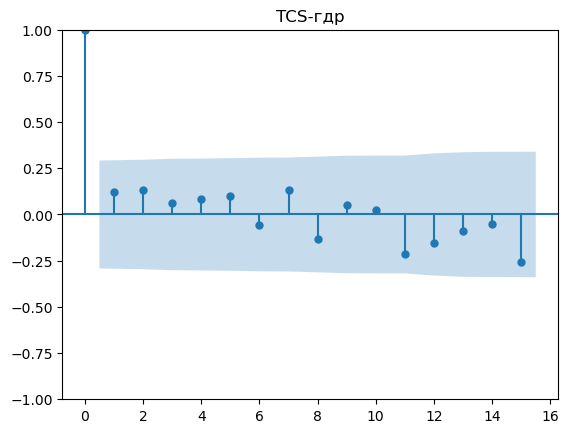

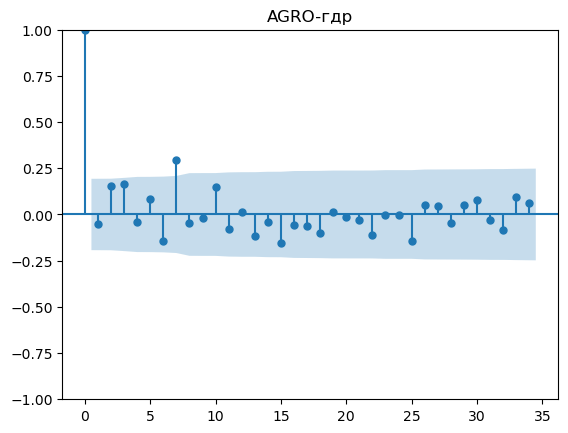

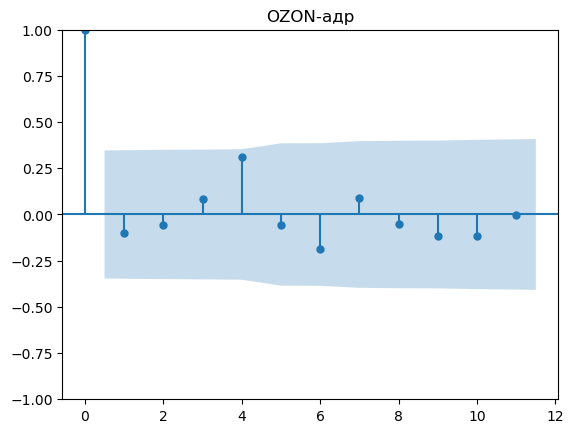

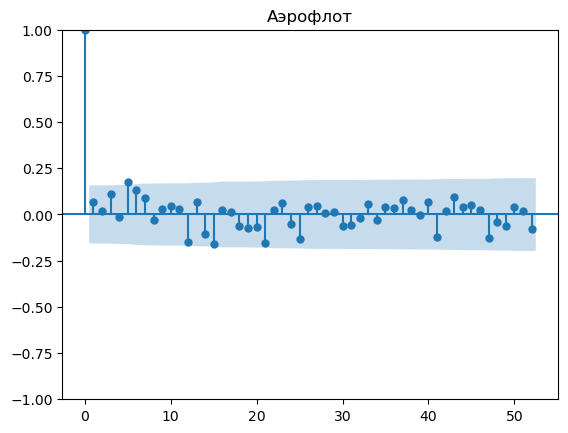

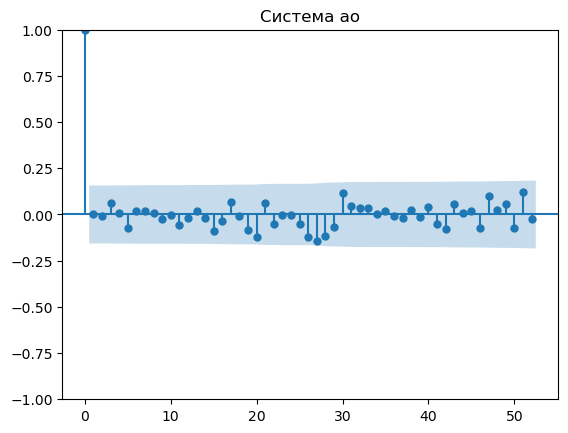

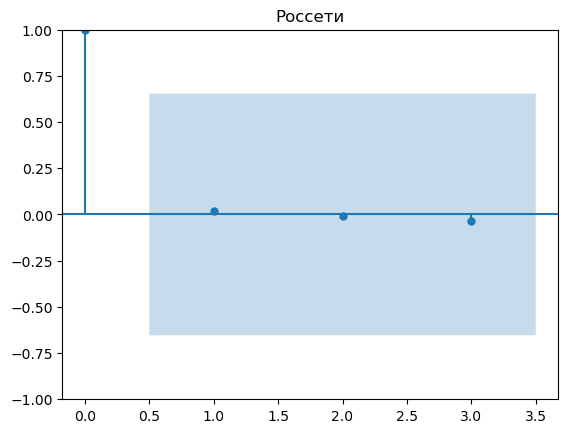

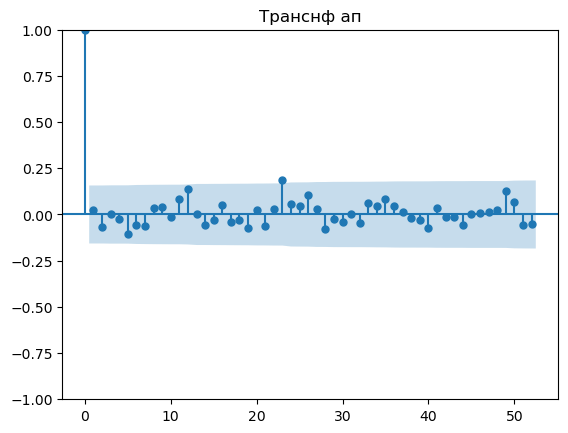

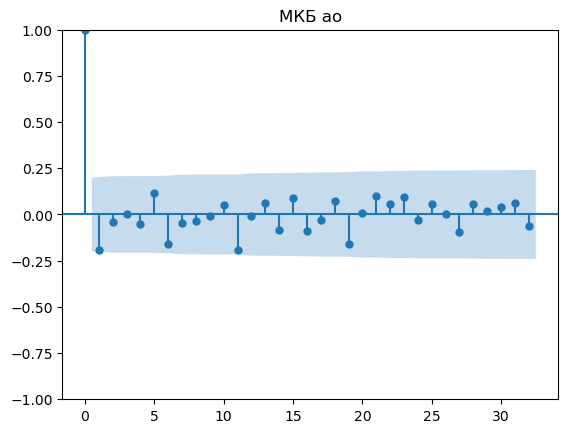

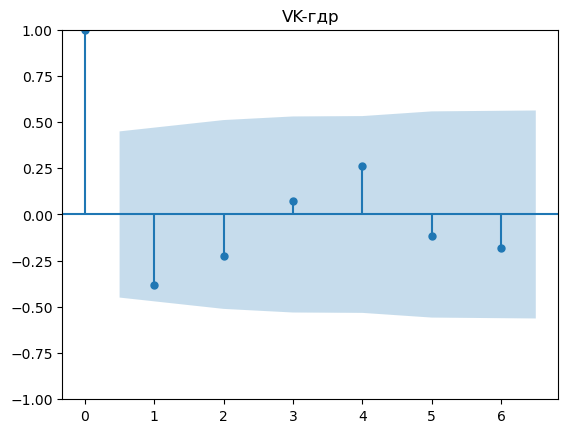

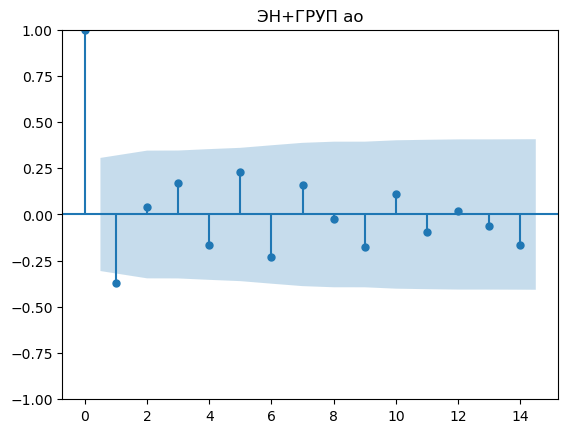

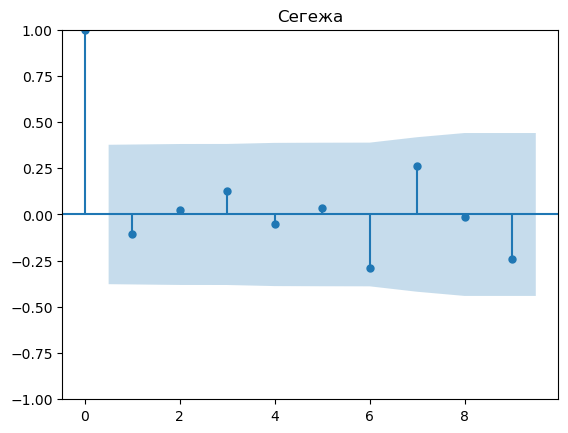

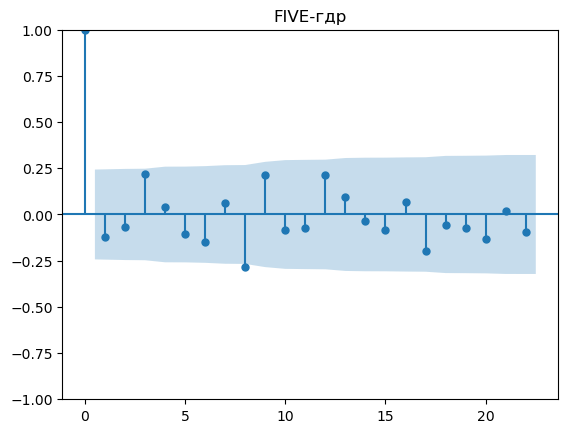

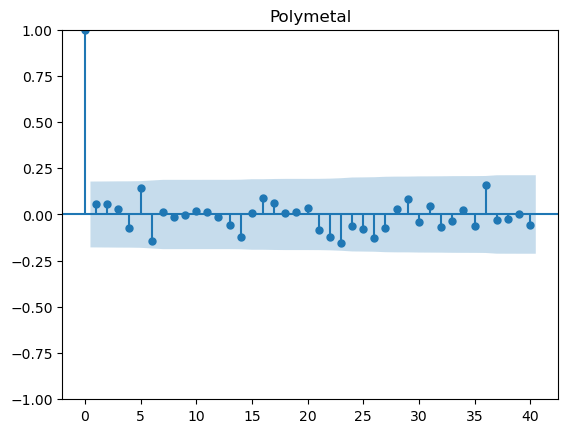

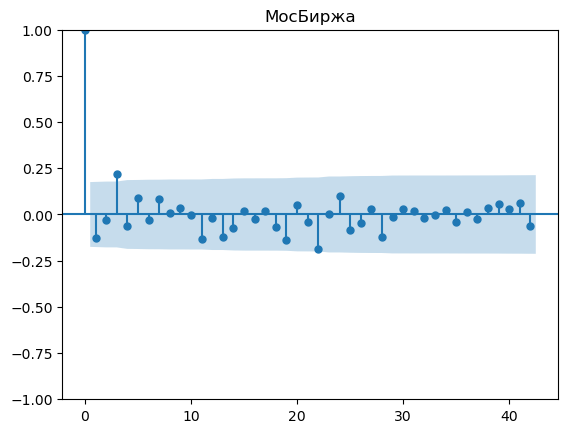

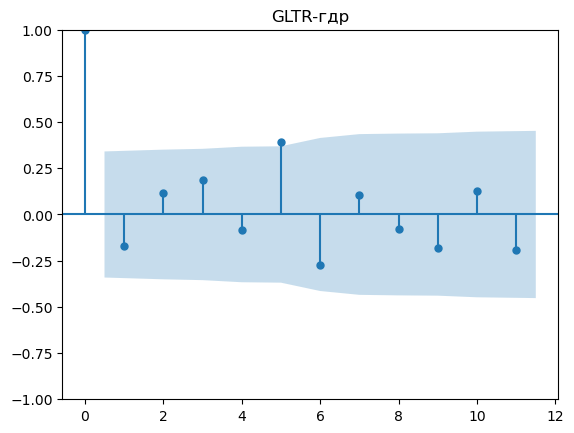

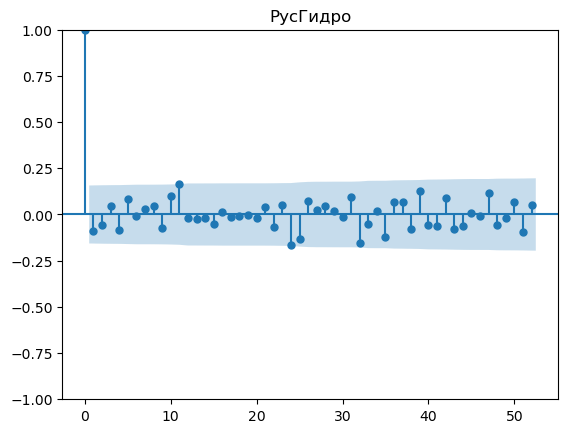

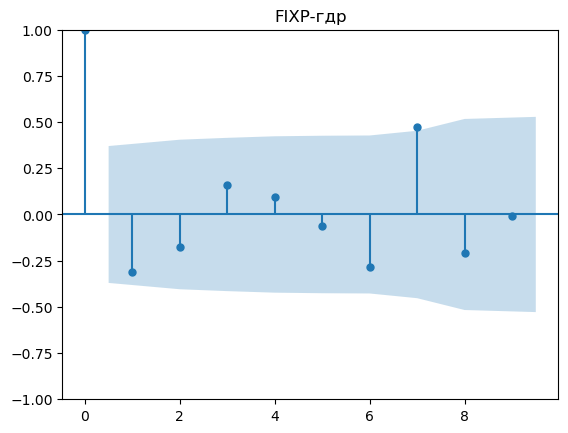

In [8]:
for i in companies:
    company_df = df.loc[df['TICKER'] == i]
    company_df['earn'] = company_df.CLOSE.pct_change()
    series = company_df[['DATE','earn']].set_index('DATE').dropna()
    plot_acf(series , lags = len(company_df.TICKER)/3,title=company_df.TICKER.unique()[0])
    plt.show

# ТАБЛИЦА РАЗМЕРНОСТЕЙ РЯДОВ

In [13]:
for i in companies:
    company_df = df.loc[df['TICKER'] == i]
    company_df['earn'] = company_df.CLOSE.pct_change()
    series = company_df[['DATE','earn']].set_index('DATE').dropna()
    print('Размер ряда для {} :{}'.format(i,series.shape[0]))

Размер ряда для ГАЗПРОМ ао :156
Размер ряда для Сбербанк :156
Размер ряда для ЛУКОЙЛ :156
Размер ряда для ГМКНорНик :156
Размер ряда для Магнит ао :156
Размер ряда для Татнфт 3ао :156
Размер ряда для Новатэк ао :156
Размер ряда для Сургнфгз :156
Размер ряда для Полюс :87
Размер ряда для Сургнфгз-п :156
Размер ряда для ПИК ао :156
Размер ряда для Роснефть :156
Размер ряда для Сбербанк-п :156
Размер ряда для СевСт-ао :156
Размер ряда для НЛМК ао :156
Размер ряда для ИнтерРАОао :156
Размер ряда для Yandex clA :109
Размер ряда для АЛРОСА ао :140
Размер ряда для РУСАЛ ао :34
Размер ряда для МТС-ао :156
Размер ряда для ММК :156
Размер ряда для ФосАгро ао :144
Размер ряда для Ростел -ао :156
Размер ряда для ВТБ ао :156
Размер ряда для Татнфт 3ап :156
Размер ряда для TCS-гдр :45
Размер ряда для AGRO-гдр :103
Размер ряда для OZON-адр :32
Размер ряда для Аэрофлот :156
Размер ряда для Система ао :156
Размер ряда для Россети :9
Размер ряда для Транснф ап :156
Размер ряда для МКБ ао :96
Размер ряда

# ПОДБОР ПАРАМЕТРОВ ДЛЯ ARIMA КОМПАНИЙ С ПОЛНЫМ DF

Создание словаря params_n

In [14]:
params_n = {}
for i in companies:
    company_df = df.loc[df['TICKER'] == i]
    if company_df.CLOSE.shape[0] == 157 : 
        company_df['earn'] = company_df.CLOSE.pct_change()
        series = company_df[['DATE','earn']].set_index('DATE').dropna()
        train_df = series.loc[:"2020-01-01"]
        test_df = series.loc["2020-02-01":]
        res = statsmodels.tsa.stattools.arma_order_select_ic(train_df.earn, ic=["aic", "bic"], trend="n")
        params_n[i] = [res.bic_min_order , res.aic_min_order]

Создание словаря params_c

In [16]:
params_c = {}
for i in companies:
    company_df = df.loc[df['TICKER'] == i]
    if company_df.CLOSE.shape[0] == 157 : 
        company_df['earn'] = company_df.CLOSE.pct_change()
        series = company_df[['DATE','earn']].set_index('DATE').dropna()
        train_df = series.loc[:"2020-01-01"]
        test_df = series.loc["2020-02-01":]
        res = statsmodels.tsa.stattools.arma_order_select_ic(train_df.earn, ic=["aic", "bic"], trend="n")
        params_c[i] = [res.bic_min_order , res.aic_min_order]

In [17]:
for i in params_c.keys() : 
    print(i,'bic{}'.format(params_c[i][0]),'aic{}'.format(params_c[i][1]) )

ГАЗПРОМ ао bic(0, 0) aic(0, 0)
Сбербанк bic(0, 0) aic(2, 2)
ЛУКОЙЛ bic(0, 0) aic(3, 1)
ГМКНорНик bic(0, 0) aic(0, 0)
Магнит ао bic(0, 0) aic(0, 0)
Татнфт 3ао bic(0, 0) aic(2, 2)
Новатэк ао bic(0, 0) aic(2, 2)
Сургнфгз bic(0, 0) aic(0, 0)
Сургнфгз-п bic(1, 0) aic(3, 1)
ПИК ао bic(0, 0) aic(2, 2)
Роснефть bic(0, 0) aic(2, 1)
Сбербанк-п bic(0, 0) aic(2, 0)
СевСт-ао bic(0, 0) aic(3, 0)
НЛМК ао bic(0, 0) aic(2, 2)
ИнтерРАОао bic(0, 0) aic(0, 0)
МТС-ао bic(0, 0) aic(2, 2)
ММК bic(0, 0) aic(3, 2)
Ростел -ао bic(0, 0) aic(0, 2)
ВТБ ао bic(0, 0) aic(0, 0)
Татнфт 3ап bic(0, 0) aic(3, 1)
Аэрофлот bic(0, 0) aic(1, 1)
Система ао bic(0, 0) aic(0, 0)
Транснф ап bic(0, 0) aic(0, 0)
РусГидро bic(0, 0) aic(0, 0)


In [15]:
for i in params_n.keys() : 
    print(i,'bic{}'.format(params_n[i][0]),'aic{}'.format(params_n[i][1]) )

ГАЗПРОМ ао bic(0, 0) aic(0, 0)
Сбербанк bic(0, 0) aic(2, 2)
ЛУКОЙЛ bic(0, 0) aic(3, 1)
ГМКНорНик bic(0, 0) aic(0, 0)
Магнит ао bic(0, 0) aic(0, 0)
Татнфт 3ао bic(0, 0) aic(2, 2)
Новатэк ао bic(0, 0) aic(2, 2)
Сургнфгз bic(0, 0) aic(0, 0)
Сургнфгз-п bic(1, 0) aic(3, 1)
ПИК ао bic(0, 0) aic(2, 2)
Роснефть bic(0, 0) aic(2, 1)
Сбербанк-п bic(0, 0) aic(2, 0)
СевСт-ао bic(0, 0) aic(3, 0)
НЛМК ао bic(0, 0) aic(2, 2)
ИнтерРАОао bic(0, 0) aic(0, 0)
МТС-ао bic(0, 0) aic(2, 2)
ММК bic(0, 0) aic(3, 2)
Ростел -ао bic(0, 0) aic(0, 2)
ВТБ ао bic(0, 0) aic(0, 0)
Татнфт 3ап bic(0, 0) aic(3, 1)
Аэрофлот bic(0, 0) aic(1, 1)
Система ао bic(0, 0) aic(0, 0)
Транснф ап bic(0, 0) aic(0, 0)
РусГидро bic(0, 0) aic(0, 0)


ПРОВЕРКА МОДЕЛЕЙ ИЗ PARAM-C


In [189]:
for j in companies:
    #Создаём дф и временной ряд доходностей
    company_df = df.loc[df['TICKER'] == j]
    company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
    company_df.replace([np.inf, -np.inf], 100, inplace=True)
    company_df = company_df.loc[company_df.earn != 100]
    series = company_df[['DATE','earn']].set_index('DATE')
    #Делаем train и test выборки
    historic = series.earn.iloc[:int(len(series) * 0.7)].to_list()
    test = series.earn.iloc[int(len(series) * 0.7):]
    #Проверяем модель на параметрах bic
    predictions = []
    for i in range(len(test)):
        model = ARIMA(historic, order=(params_c[j][0][0],0,params_c[j][0][1]))
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index) 
    #Рассёт качества модели : MSE, MAE, Hit-Rate  
    #MSE
    test_score = mean_squared_error(test, predictions)
    #MAE
    mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
    #Hit-Rate
    price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
    price_pred.dropna(inplace=True)
    price_pred.columns = ['Price', 'preds']
    price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
    #Результирующее сообщение
    print("Компания '{}'".format(j),'BIC')
    print('Test MSE: %.5f' % test_score)
    print(f'The MAE is {mae}')
    print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")
    
    #Проверяем модель на параметрах aic
    predictions = []
    for i in range(len(test)):
        model = ARIMA(historic, order=(params_c[j][1][0],0,params_c[j][1][1]))
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index) 
    #Рассёт качества модели : MSE, MAE, Hit-Rate  
    #MSE
    test_score = mean_squared_error(test, predictions)
    #MAE
    mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
    #Hit-Rate
    price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
    price_pred.dropna(inplace=True)
    price_pred.columns = ['Price', 'preds']
    price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
    #Результирующее сообщение
    print("Компания '{}'".format(j),'AIC')
    print('Test MSE: %.5f' % test_score)
    print(f'The MAE is {mae}')
    print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ГАЗПРОМ ао' BIC
Test MSE: 0.01375
The MAE is 4.1572809138
Hit rate: 52.17%
Компания 'ГАЗПРОМ ао' AIC
Test MSE: 0.01400
The MAE is 7.5095384305
Hit rate: 63.04%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сбербанк' BIC
Test MSE: 0.01410
The MAE is 2.9202057854
Hit rate: 41.3%
Компания 'Сбербанк' AIC
Test MSE: 0.01407
The MAE is 2.9185979342
Hit rate: 41.3%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ЛУКОЙЛ' BIC
Test MSE: 0.01077
The MAE is 4.7224908842
Hit rate: 50.0%
Компания 'ЛУКОЙЛ' AIC
Test MSE: 0.01005
The MAE is 22.0113803634
Hit rate: 65.22%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ГМКНорНик' BIC
Test MSE: 0.00594
The MAE is 10.7287493427
Hit rate: 39.13%
Компания 'ГМКНорНик' AIC
Test MSE: 0.00590
The MAE is 10.7293400856
Hit rate: 39.13%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Магнит ао' BIC
Test MSE: 0.01245
The MAE is 4.0041363057
Hit rate: 45.65%
Компания 'Магнит ао' AIC
Test MSE: 0.01171
The MAE is 5.396321996
Hit rate: 67.39%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Татнфт 3ао' BIC
Test MSE: 0.01050
The MAE is 7.1109550895
Hit rate: 52.17%
Компания 'Татнфт 3ао' AIC
Test MSE: 0.01024
The MAE is 8.5909575712
Hit rate: 67.39%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Новатэк ао' BIC
Test MSE: 0.01270
The MAE is 3.4223432471
Hit rate: 63.04%
Компания 'Новатэк ао' AIC
Test MSE: 0.01153
The MAE is 4.4850632392
Hit rate: 56.52%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сургнфгз' BIC
Test MSE: 0.01457
The MAE is 6.6244413046
Hit rate: 54.35%
Компания 'Сургнфгз' AIC
Test MSE: 0.01472
The MAE is 4.6028455855
Hit rate: 52.17%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Полюс' BIC
Test MSE: 0.01980
The MAE is 2.9428856003
Hit rate: 46.15%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'Полюс' AIC
Test MSE: 0.01548
The MAE is 15.9935020951
Hit rate: 53.85%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сургнфгз-п' BIC
Test MSE: 0.01005
The MAE is 4.2998925594
Hit rate: 65.22%
Компания 'Сургнфгз-п' AIC
Test MSE: 0.01000
The MAE is 6.8930377963
Hit rate: 67.39%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

Компания 'ПИК ао' BIC
Test MSE: 0.01862
The MAE is 10.6257501541
Hit rate: 63.04%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Компания 'ПИК ао' AIC
Test MSE: 0.01644
The MAE is 9.1454953702
Hit rate: 69.57%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Роснефть' BIC
Test MSE: 0.01784
The MAE is 3.846313855
Hit rate: 56.52%
Компания 'Роснефть' AIC
Test MSE: 0.01640
The MAE is 8.1452307445
Hit rate: 69.57%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сбербанк-п' BIC
Test MSE: 0.01312
The MAE is 8.9080574101
Hit rate: 41.3%
Компания 'Сбербанк-п' AIC
Test MSE: 0.01276
The MAE is 9.4694566787
Hit rate: 54.35%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'СевСт-ао' BIC
Test MSE: 0.00952
The MAE is 2.8337835744
Hit rate: 47.83%
Компания 'СевСт-ао' AIC
Test MSE: 0.00973
The MAE is 4.7300068937
Hit rate: 52.17%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'НЛМК ао' BIC
Test MSE: 0.00862
The MAE is 3.8310885464
Hit rate: 50.0%
Компания 'НЛМК ао' AIC
Test MSE: 0.00861
The MAE is 3.8288203111
Hit rate: 50.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ИнтерРАОао' BIC
Test MSE: 0.60443
The MAE is 4.4936663285
Hit rate: 73.91%
Компания 'ИнтерРАОао' AIC
Test MSE: 0.32786
The MAE is 4.4946008037
Hit rate: 73.91%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Yandex clA' BIC
Test MSE: 0.01862
The MAE is 2.7035958195
Hit rate: 43.75%
Компания 'Yandex clA' AIC
Test MSE: 0.01830
The MAE is 2.7069176464
Hit rate: 40.62%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'АЛРОСА ао' BIC
Test MSE: 0.01122
The MAE is 2.4104958265
Hit rate: 48.78%
Компания 'АЛРОСА ао' AIC
Test MSE: 0.01120
The MAE is 2.4090343271
Hit rate: 48.78%
Компания 'РУСАЛ ао' BIC
Test MSE: 0.01237
The MAE is 3.381448158
Hit rate: 60.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'РУСАЛ ао' AIC
Test MSE: 0.01184
The MAE is 3.3905660639
Hit rate: 40.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

Компания 'МТС-ао' BIC
Test MSE: 0.00645
The MAE is inf
Hit rate: 60.87%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'МТС-ао' AIC
Test MSE: 0.00661
The MAE is inf
Hit rate: 67.39%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ММК' BIC
Test MSE: 0.01263
The MAE is 2.1849482399
Hit rate: 50.0%
Компания 'ММК' AIC
Test MSE: 0.01260
The MAE is 2.1834273473
Hit rate: 50.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ФосАгро ао' BIC
Test MSE: 0.01267
The MAE is 3.204499217
Hit rate: 51.16%
Компания 'ФосАгро ао' AIC
Test MSE: 0.01236
The MAE is 3.1742849492
Hit rate: 44.19%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Ростел -ао' BIC
Test MSE: 0.00459
The MAE is inf
Hit rate: 52.17%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'Ростел -ао' AIC
Test MSE: 0.00447
The MAE is inf
Hit rate: 63.04%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ВТБ ао' BIC
Test MSE: 0.01440
The MAE is 9.1856982498
Hit rate: 54.35%
Компания 'ВТБ ао' AIC
Test MSE: 0.01437
The MAE is 9.351447122
Hit rate: 52.17%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Татнфт 3ап' BIC
Test MSE: 0.00978
The MAE is 3.269331214
Hit rate: 52.17%
Компания 'Татнфт 3ап' AIC
Test MSE: 0.00910
The MAE is 7.1421754836
Hit rate: 56.52%
Компания 'TCS-гдр' BIC
Test MSE: 0.01894
The MAE is 2.2207771733
Hit rate: 69.23%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'TCS-гдр' AIC
Test MSE: 0.01876
The MAE is 2.2209477806
Hit rate: 69.23%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'AGRO-гдр' BIC
Test MSE: 0.01203
The MAE is 1.6426494615
Hit rate: 50.0%
Компания 'AGRO-гдр' AIC
Test MSE: 0.01024
The MAE is 2.7938111269
Hit rate: 66.67%
Компания 'OZON-адр' BIC
Test MSE: 0.01674
The MAE is 3.698523091
Hit rate: 66.67%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'OZON-адр' AIC
Test MSE: 0.01334
The MAE is 3.8538906134
Hit rate: 44.44%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Аэрофлот' BIC
Test MSE: 0.01310
The MAE is 3.3341737526
Hit rate: 45.65%
Компания 'Аэрофлот' AIC
Test MSE: 0.01290
The MAE is 3.1776012182
Hit rate: 39.13%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Система ао' BIC
Test MSE: 0.01428
The MAE is 4.2481131569
Hit rate: 47.83%
Компания 'Система ао' AIC
Test MSE: 0.01418
The MAE is 4.2313097969
Hit rate: 45.65%
Компания 'Россети' BIC
Test MSE: 0.01588
The MAE is 1.702003424
Hit rate: 50.0%
Компания 'Россети' AIC
Test MSE: 0.00992
The MAE is 1.6972653534
Hit rate: 50.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Компания 'Транснф ап' BIC
Test MSE: 0.00799
The MAE is 3.1745955755
Hit rate: 47.83%
Компания 'Транснф ап' AIC
Test MSE: 0.00788
The MAE is 3.1753591995
Hit rate: 45.65%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'МКБ ао' BIC
Test MSE: 0.00751
The MAE is 5.3310483959
Hit rate: 53.57%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'МКБ ао' AIC
Test MSE: 0.00740
The MAE is 42.7869532698
Hit rate: 50.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'VK-гдр' BIC
Test MSE: 0.01241
The MAE is 29.8076357127
Hit rate: 80.0%
Компания 'VK-гдр' AIC
Test MSE: 0.02036
The MAE is 1.8021532636
Hit rate: 80.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ЭН+ГРУП ао' BIC
Test MSE: 0.01663
The MAE is 6.9819974065
Hit rate: 83.33%
Компания 'ЭН+ГРУП ао' AIC
Test MSE: 0.01261
The MAE is 1.8672907481
Hit rate: 75.0%
Компания 'Сегежа' BIC
Test MSE: 0.00619
The MAE is 1.0902649385
Hit rate: 50.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сегежа' AIC
Test MSE: 0.00577
The MAE is 0.9599602414
Hit rate: 62.5%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'FIVE-гдр' BIC
Test MSE: 0.03253
The MAE is 4.8669429939
Hit rate: 47.37%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'FIVE-гдр' AIC
Test MSE: 0.03898
The MAE is 3.8265852431
Hit rate: 68.42%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Polymetal' BIC
Test MSE: 0.03225
The MAE is 2.3504065591
Hit rate: 47.22%
Компания 'Polymetal' AIC
Test MSE: 0.03179
The MAE is 2.3559090587
Hit rate: 47.22%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'МосБиржа' BIC
Test MSE: 0.00814
The MAE is 4.1354564666
Hit rate: 43.24%
Компания 'МосБиржа' AIC
Test MSE: 0.00781
The MAE is 7.7114164697
Hit rate: 67.57%
Компания 'GLTR-гдр' BIC
Test MSE: 0.01787
The MAE is 2.4497762809
Hit rate: 66.67%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'GLTR-гдр' AIC
Test MSE: 0.01413
The MAE is 2.0369578357
Hit rate: 33.33%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'РусГидро' BIC
Test MSE: 0.00432
The MAE is 2.9902859333
Hit rate: 45.65%
Компания 'РусГидро' AIC
Test MSE: 0.00421
The MAE is 3.2376530937
Hit rate: 43.48%
Компания 'FIXP-гдр' BIC
Test MSE: 0.01290
The MAE is 1.2993002482
Hit rate: 75.0%


/tmp/ipykernel_6112/2443120520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2443120520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'FIXP-гдр' AIC
Test MSE: 0.00340
The MAE is 51.4314466146
Hit rate: 75.0%


ПРОВЕРКА МОДЕЛЕЙ ИЗ PARAM-N

In [191]:
for j in companies:
    #Создаём дф и временной ряд доходностей
    company_df = df.loc[df['TICKER'] == j]
    company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
    company_df.replace([np.inf, -np.inf], 100, inplace=True)
    company_df = company_df.loc[company_df.earn != 100]
    series = company_df[['DATE','earn']].set_index('DATE')
    #Делаем train и test выборки
    historic = series.earn.iloc[:int(len(series) * 0.7)].to_list()
    test = series.earn.iloc[int(len(series) * 0.7):]
    #Проверяем модель на параметрах bic
    predictions = []
    for i in range(len(test)):
        model = ARIMA(historic, order=(params_n[j][0][0],0,params_n[j][0][1]))
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index) 
    #Рассёт качества модели : MSE, MAE, Hit-Rate  
    #MSE
    test_score = mean_squared_error(test, predictions)
    #MAE
    mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
    #Hit-Rate
    price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
    price_pred.dropna(inplace=True)
    price_pred.columns = ['Price', 'preds']
    price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
    #Результирующее сообщение
    print("Компания '{}'".format(j),'BIC')
    print('Test MSE: %.5f' % test_score)
    print(f'The MAE is {mae}')
    print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")
    
    #Проверяем модель на параметрах aic
    predictions = []
    for i in range(len(test)):
        model = ARIMA(historic, order=(params_n[j][1][0],0,params_n[j][1][1]))
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index) 
    #Рассёт качества модели : MSE, MAE, Hit-Rate  
    #MSE
    test_score = mean_squared_error(test, predictions)
    #MAE
    mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
    #Hit-Rate
    price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
    price_pred.dropna(inplace=True)
    price_pred.columns = ['Price', 'preds']
    price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
    #Результирующее сообщение
    print("Компания '{}'".format(j),'AIC')
    print('Test MSE: %.5f' % test_score)
    print(f'The MAE is {mae}')
    print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ГАЗПРОМ ао' BIC
Test MSE: 0.01375
The MAE is 4.1572809138
Hit rate: 52.17%
Компания 'ГАЗПРОМ ао' AIC
Test MSE: 0.01400
The MAE is 7.5095384305
Hit rate: 63.04%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сбербанк' BIC
Test MSE: 0.01410
The MAE is 2.9202057854
Hit rate: 41.3%
Компания 'Сбербанк' AIC
Test MSE: 0.01365
The MAE is 4.5010168286
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

Компания 'ЛУКОЙЛ' BIC
Test MSE: 0.01098
The MAE is 7.6124736363
Hit rate: 52.17%
Компания 'ЛУКОЙЛ' AIC
Test MSE: 0.01005
The MAE is 22.0113803634
Hit rate: 65.22%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ГМКНорНик' BIC
Test MSE: 0.00594
The MAE is 10.7287493427
Hit rate: 39.13%
Компания 'ГМКНорНик' AIC
Test MSE: 0.00590
The MAE is 10.7293400856
Hit rate: 39.13%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Магнит ао' BIC
Test MSE: 0.01245
The MAE is 4.0041363057
Hit rate: 45.65%
Компания 'Магнит ао' AIC
Test MSE: 0.01171
The MAE is 5.396321996
Hit rate: 67.39%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Татнфт 3ао' BIC
Test MSE: 0.01050
The MAE is 7.1109550895
Hit rate: 52.17%
Компания 'Татнфт 3ао' AIC
Test MSE: 0.01034
The MAE is 7.1120957313
Hit rate: 52.17%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Новатэк ао' BIC
Test MSE: 0.01314
The MAE is 2.6461104114
Hit rate: 45.65%
Компания 'Новатэк ао' AIC
Test MSE: 0.01171
The MAE is 7.9896103134
Hit rate: 58.7%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сургнфгз' BIC
Test MSE: 0.01430
The MAE is 2.4722068071
Hit rate: 47.83%
Компания 'Сургнфгз' AIC
Test MSE: 0.01472
The MAE is 4.6028455855
Hit rate: 52.17%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Полюс' BIC
Test MSE: 0.01980
The MAE is 2.9428856003
Hit rate: 46.15%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'Полюс' AIC
Test MSE: 0.01548
The MAE is 15.9935020951
Hit rate: 53.85%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сургнфгз-п' BIC
Test MSE: 0.01005
The MAE is 4.2998925594
Hit rate: 65.22%
Компания 'Сургнфгз-п' AIC
Test MSE: 0.01000
The MAE is 6.8930377963
Hit rate: 67.39%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

Компания 'ПИК ао' BIC
Test MSE: 0.01862
The MAE is 10.6257501541
Hit rate: 63.04%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'ПИК ао' AIC
Test MSE: 0.01553
The MAE is 8.8884472503
Hit rate: 69.57%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Роснефть' BIC
Test MSE: 0.01784
The MAE is 3.846313855
Hit rate: 56.52%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'Роснефть' AIC
Test MSE: 0.01573
The MAE is 19.6477060166
Hit rate: 65.22%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сбербанк-п' BIC
Test MSE: 0.01312
The MAE is 8.9080574101
Hit rate: 41.3%
Компания 'Сбербанк-п' AIC
Test MSE: 0.01276
The MAE is 9.4694566787
Hit rate: 54.35%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'СевСт-ао' BIC
Test MSE: 0.00952
The MAE is 2.8337835744
Hit rate: 47.83%
Компания 'СевСт-ао' AIC
Test MSE: 0.00974
The MAE is 4.4431051912
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'НЛМК ао' BIC
Test MSE: 0.00862
The MAE is 3.8310885464
Hit rate: 50.0%
Компания 'НЛМК ао' AIC
Test MSE: 0.00861
The MAE is 3.8288203111
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ИнтерРАОао' BIC
Test MSE: 0.60443
The MAE is 4.4936663285
Hit rate: 73.91%
Компания 'ИнтерРАОао' AIC
Test MSE: 0.32786
The MAE is 4.4946008037
Hit rate: 73.91%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Yandex clA' BIC
Test MSE: 0.01862
The MAE is 2.7035958195
Hit rate: 43.75%
Компания 'Yandex clA' AIC
Test MSE: 0.01830
The MAE is 2.7069176464
Hit rate: 40.62%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'АЛРОСА ао' BIC
Test MSE: 0.01122
The MAE is 2.4104958265
Hit rate: 48.78%
Компания 'АЛРОСА ао' AIC
Test MSE: 0.01120
The MAE is 2.4090343271
Hit rate: 48.78%
Компания 'РУСАЛ ао' BIC
Test MSE: 0.01237
The MAE is 3.381448158
Hit rate: 60.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'РУСАЛ ао' AIC
Test MSE: 0.01184
The MAE is 3.3905660639
Hit rate: 40.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'МТС-ао' BIC
Test MSE: 0.00702
The MAE is inf
Hit rate: 69.57%
Компания 'МТС-ао' AIC
Test MSE: 0.00667
The MAE is inf
Hit rate: 69.57%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ММК' BIC
Test MSE: 0.01263
The MAE is 2.1849482399
Hit rate: 50.0%
Компания 'ММК' AIC
Test MSE: 0.01260
The MAE is 2.1834273473
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ФосАгро ао' BIC
Test MSE: 0.01267
The MAE is 3.204499217
Hit rate: 51.16%
Компания 'ФосАгро ао' AIC
Test MSE: 0.01236
The MAE is 3.1742849492
Hit rate: 44.19%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Ростел -ао' BIC
Test MSE: 0.00459
The MAE is inf
Hit rate: 52.17%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'Ростел -ао' AIC
Test MSE: 0.00447
The MAE is inf
Hit rate: 63.04%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ВТБ ао' BIC
Test MSE: 0.01440
The MAE is 9.1856982498
Hit rate: 54.35%
Компания 'ВТБ ао' AIC
Test MSE: 0.01437
The MAE is 9.351447122
Hit rate: 52.17%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Татнфт 3ап' BIC
Test MSE: 0.00978
The MAE is 3.269331214
Hit rate: 52.17%
Компания 'Татнфт 3ап' AIC
Test MSE: 0.00920
The MAE is 5.5146178227
Hit rate: 54.35%
Компания 'TCS-гдр' BIC
Test MSE: 0.01894
The MAE is 2.2207771733
Hit rate: 69.23%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'TCS-гдр' AIC
Test MSE: 0.01876
The MAE is 2.2209477806
Hit rate: 69.23%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'AGRO-гдр' BIC
Test MSE: 0.01203
The MAE is 1.6426494615
Hit rate: 50.0%
Компания 'AGRO-гдр' AIC
Test MSE: 0.01024
The MAE is 2.7938111269
Hit rate: 66.67%
Компания 'OZON-адр' BIC
Test MSE: 0.01674
The MAE is 3.698523091
Hit rate: 66.67%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'OZON-адр' AIC
Test MSE: 0.01334
The MAE is 3.8538906134
Hit rate: 44.44%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Аэрофлот' BIC
Test MSE: 0.01310
The MAE is 3.3341737526
Hit rate: 45.65%
Компания 'Аэрофлот' AIC
Test MSE: 0.01290
The MAE is 3.1776012182
Hit rate: 39.13%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Система ао' BIC
Test MSE: 0.01428
The MAE is 4.2481131569
Hit rate: 47.83%
Компания 'Система ао' AIC
Test MSE: 0.01418
The MAE is 4.2313097969
Hit rate: 45.65%
Компания 'Россети' BIC
Test MSE: 0.01588
The MAE is 1.702003424
Hit rate: 50.0%
Компания 'Россети' AIC
Test MSE: 0.00992
The MAE is 1.6972653534
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Компания 'Транснф ап' BIC
Test MSE: 0.00799
The MAE is 3.1745955755
Hit rate: 47.83%
Компания 'Транснф ап' AIC
Test MSE: 0.00788
The MAE is 3.1753591995
Hit rate: 45.65%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'МКБ ао' BIC
Test MSE: 0.00751
The MAE is 5.3310483959
Hit rate: 53.57%
Компания 'МКБ ао' AIC
Test MSE: 0.00729
The MAE is 20.8813617244
Hit rate: 64.29%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'VK-гдр' BIC
Test MSE: 0.00908
The MAE is 1.4854823027
Hit rate: 80.0%
Компания 'VK-гдр' AIC
Test MSE: 0.02311
The MAE is 8.0853589443
Hit rate: 80.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'ЭН+ГРУП ао' BIC
Test MSE: 0.01663
The MAE is 6.9819974065
Hit rate: 83.33%
Компания 'ЭН+ГРУП ао' AIC
Test MSE: 0.01261
The MAE is 1.8672907481
Hit rate: 75.0%
Компания 'Сегежа' BIC
Test MSE: 0.00619
The MAE is 1.0902649385
Hit rate: 50.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Сегежа' AIC
Test MSE: 0.00577
The MAE is 0.9599602414
Hit rate: 62.5%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'FIVE-гдр' BIC
Test MSE: 0.03253
The MAE is 4.8669429939
Hit rate: 47.37%


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Компания 'FIVE-гдр' AIC
Test MSE: 0.03898
The MAE is 3.8265852431
Hit rate: 68.42%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'Polymetal' BIC
Test MSE: 0.03225
The MAE is 2.3504065591
Hit rate: 47.22%
Компания 'Polymetal' AIC
Test MSE: 0.03179
The MAE is 2.3559090587
Hit rate: 47.22%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'МосБиржа' BIC
Test MSE: 0.00814
The MAE is 4.1354564666
Hit rate: 43.24%
Компания 'МосБиржа' AIC
Test MSE: 0.00781
The MAE is 7.7114164697
Hit rate: 67.57%
Компания 'GLTR-гдр' BIC
Test MSE: 0.01787
The MAE is 2.4497762809
Hit rate: 66.67%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'GLTR-гдр' AIC
Test MSE: 0.01413
The MAE is 2.0369578357
Hit rate: 33.33%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'РусГидро' BIC
Test MSE: 0.00432
The MAE is 2.9902859333
Hit rate: 45.65%
Компания 'РусГидро' AIC
Test MSE: 0.00421
The MAE is 3.2376530937
Hit rate: 43.48%
Компания 'FIXP-гдр' BIC
Test MSE: 0.01290
The MAE is 1.2993002482
Hit rate: 75.0%


/tmp/ipykernel_6112/2906497072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_6112/2906497072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Компания 'FIXP-гдр' AIC
Test MSE: 0.00340
The MAE is 51.4314466146
Hit rate: 75.0%


Пробуем для каждой компании компании методом ручного подбора параметров установить на каких будет лучший Hit-Rate

In [94]:
params = [(0,0,1),(0,0,2),(0,0,3),(0,0,4)\
          ,(1,0,0),(1,0,1),(1,0,2),(1,0,3),(1,0,4)\
          ,(2,0,0),(2,0,1),(2,0,2),(2,0,3),(2,0,4)\
          ,(3,0,0),(3,0,1),(3,0,2),(3,0,3),(3,0,4)\
          ,(4,0,0),(4,0,1),(4,0,2),(4,0,3),(4,0,4)\
          ,(5,0,0),(5,0,1),(5,0,2),(5,0,3),(5,0,4)\
          ,(6,0,0),(6,0,1),(6,0,2),(6,0,3),(6,0,4)]

In [98]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

for j in companies:
    #Создаём дф и временной ряд доходностей
    company_df = df.loc[df['TICKER'] == j]
    company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
    company_df.replace([np.inf, -np.inf], 100, inplace=True)
    company_df = company_df.loc[company_df.earn != 100]
    series = company_df[['DATE','earn']].set_index('DATE')
    dct = {'Company':[],'parameters': [], 'MSE': [] , 'MAE':[] , 'Hit-Rate':[]}
    #Для каждого параметра создаём выборку и обучаем модель
    for param in params :
        historic = series.earn.iloc[:int(len(series) * 0.7)].to_list()
        test = series.earn.iloc[int(len(series) * 0.7):]
        predictions = []
        for i in range(len(test)):
            model = ARIMA(historic, order=param)
            model_fit = model.fit()
            pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
            predictions.append(pred[0])
            historic.append(test[i])
        predictions = pd.Series(predictions, index=test.index)  
        #Рассёт качества модели : MSE, MAE, Hit-Rate  
        #MSE
        test_score = mean_squared_error(test, predictions)
        #MAE
        mae = round(abs(test - predictions).mean(),10)
        #Hit-Rate
        price_pred = pd.concat([test, predictions], axis=1)
        price_pred.dropna(inplace=True)
        price_pred.columns = ['Price', 'preds']
        price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
        #Добавляем полученные данные в словарь
        dct['Company'].append(j)
        dct['parameters'].append(param)
        dct['MSE'].append(test_score)
        dct['MAE'].append(mae)
        dct['Hit-Rate'].append(round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2))
    metricks = pd.DataFrame(dct)
    metricks = metricks.sort_values(by=['Hit-Rate'],ascending=False)
    print(metricks)
        

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

       Company parameters       MSE       MAE  Hit-Rate
22  ГАЗПРОМ ао  (4, 0, 3)  0.013698  0.084680     55.32
17  ГАЗПРОМ ао  (3, 0, 3)  0.014784  0.089829     51.06
18  ГАЗПРОМ ао  (3, 0, 4)  0.014180  0.089295     48.94
5   ГАЗПРОМ ао  (1, 0, 1)  0.013938  0.084645     48.94
27  ГАЗПРОМ ао  (5, 0, 3)  0.014594  0.090196     48.94
30  ГАЗПРОМ ао  (6, 0, 1)  0.015222  0.092404     46.81
29  ГАЗПРОМ ао  (6, 0, 0)  0.014970  0.090957     46.81
28  ГАЗПРОМ ао  (5, 0, 4)  0.014678  0.090946     46.81
7   ГАЗПРОМ ао  (1, 0, 3)  0.014504  0.089225     46.81
25  ГАЗПРОМ ао  (5, 0, 1)  0.014937  0.089982     46.81
20  ГАЗПРОМ ао  (4, 0, 1)  0.014357  0.088629     46.81
32  ГАЗПРОМ ао  (6, 0, 3)  0.015129  0.093436     44.68
23  ГАЗПРОМ ао  (4, 0, 4)  0.014775  0.087723     44.68
19  ГАЗПРОМ ао  (4, 0, 0)  0.014164  0.088048     44.68
33  ГАЗПРОМ ао  (6, 0, 4)  0.015119  0.092706     44.68
10  ГАЗПРОМ ао  (2, 0, 1)  0.013954  0.086646     44.68
14  ГАЗПРОМ ао  (3, 0, 0)  0.014023  0.087255   

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

     Company parameters       MSE       MAE  Hit-Rate
5   Сбербанк  (1, 0, 1)  0.014482  0.077808     65.96
6   Сбербанк  (1, 0, 2)  0.014770  0.079090     65.96
9   Сбербанк  (2, 0, 0)  0.014915  0.079494     65.96
1   Сбербанк  (0, 0, 2)  0.014857  0.079443     65.96
2   Сбербанк  (0, 0, 3)  0.014434  0.077855     63.83
7   Сбербанк  (1, 0, 3)  0.014483  0.078214     63.83
10  Сбербанк  (2, 0, 1)  0.014508  0.078308     63.83
0   Сбербанк  (0, 0, 1)  0.014442  0.078629     61.70
15  Сбербанк  (3, 0, 1)  0.014602  0.078765     61.70
4   Сбербанк  (1, 0, 0)  0.014355  0.078408     61.70
11  Сбербанк  (2, 0, 2)  0.014468  0.078865     61.70
14  Сбербанк  (3, 0, 0)  0.014601  0.078342     61.70
31  Сбербанк  (6, 0, 2)  0.014989  0.081158     59.57
29  Сбербанк  (6, 0, 0)  0.014611  0.078699     59.57
19  Сбербанк  (4, 0, 0)  0.014655  0.079251     59.57
17  Сбербанк  (3, 0, 3)  0.014617  0.079286     59.57
16  Сбербанк  (3, 0, 2)  0.014905  0.080156     57.45
3   Сбербанк  (0, 0, 4)  0.0

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

   Company parameters       MSE       MAE  Hit-Rate
17  ЛУКОЙЛ  (3, 0, 3)  0.010952  0.081947     63.83
6   ЛУКОЙЛ  (1, 0, 2)  0.011191  0.081335     63.83
19  ЛУКОЙЛ  (4, 0, 0)  0.011506  0.085529     61.70
10  ЛУКОЙЛ  (2, 0, 1)  0.011175  0.081787     59.57
28  ЛУКОЙЛ  (5, 0, 4)  0.010786  0.081887     59.57
27  ЛУКОЙЛ  (5, 0, 3)  0.011754  0.086649     59.57
18  ЛУКОЙЛ  (3, 0, 4)  0.010829  0.081766     59.57
14  ЛУКОЙЛ  (3, 0, 0)  0.011239  0.081767     59.57
0   ЛУКОЙЛ  (0, 0, 1)  0.010870  0.079988     59.57
7   ЛУКОЙЛ  (1, 0, 3)  0.011269  0.083572     59.57
5   ЛУКОЙЛ  (1, 0, 1)  0.011342  0.082876     59.57
4   ЛУКОЙЛ  (1, 0, 0)  0.010872  0.079953     59.57
8   ЛУКОЙЛ  (1, 0, 4)  0.010898  0.084160     59.57
9   ЛУКОЙЛ  (2, 0, 0)  0.011158  0.081049     57.45
22  ЛУКОЙЛ  (4, 0, 3)  0.011902  0.086690     57.45
32  ЛУКОЙЛ  (6, 0, 3)  0.011727  0.086644     57.45
12  ЛУКОЙЛ  (2, 0, 3)  0.010974  0.082562     57.45
13  ЛУКОЙЛ  (2, 0, 4)  0.011468  0.085604     57.45
15  ЛУКОЙЛ  

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


      Company parameters       MSE       MAE  Hit-Rate
17  ГМКНорНик  (3, 0, 3)  0.006111  0.061275     59.57
18  ГМКНорНик  (3, 0, 4)  0.005863  0.060944     57.45
9   ГМКНорНик  (2, 0, 0)  0.006057  0.060817     55.32
31  ГМКНорНик  (6, 0, 2)  0.005836  0.061088     55.32
27  ГМКНорНик  (5, 0, 3)  0.006017  0.060957     55.32
26  ГМКНорНик  (5, 0, 2)  0.006087  0.061281     55.32
22  ГМКНорНик  (4, 0, 3)  0.005927  0.061316     55.32
21  ГМКНорНик  (4, 0, 2)  0.006038  0.060516     55.32
12  ГМКНорНик  (2, 0, 3)  0.006235  0.061118     55.32
0   ГМКНорНик  (0, 0, 1)  0.006003  0.060504     55.32
5   ГМКНорНик  (1, 0, 1)  0.006032  0.060659     55.32
7   ГМКНорНик  (1, 0, 3)  0.006014  0.060825     55.32
4   ГМКНорНик  (1, 0, 0)  0.006010  0.060532     55.32
33  ГМКНорНик  (6, 0, 4)  0.006065  0.061085     55.32
10  ГМКНорНик  (2, 0, 1)  0.006104  0.061118     53.19
1   ГМКНорНик  (0, 0, 2)  0.006061  0.060852     53.19
6   ГМКНорНик  (1, 0, 2)  0.006053  0.060819     53.19
28  ГМКНор

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

      Company parameters       MSE       MAE  Hit-Rate
3   Магнит ао  (0, 0, 4)  0.012565  0.087543     57.45
8   Магнит ао  (1, 0, 4)  0.012633  0.087822     57.45
11  Магнит ао  (2, 0, 2)  0.013559  0.089370     55.32
2   Магнит ао  (0, 0, 3)  0.012180  0.086403     55.32
4   Магнит ао  (1, 0, 0)  0.012662  0.086455     55.32
7   Магнит ао  (1, 0, 3)  0.012478  0.087256     55.32
25  Магнит ао  (5, 0, 1)  0.012740  0.087323     55.32
0   Магнит ао  (0, 0, 1)  0.012670  0.086471     53.19
16  Магнит ао  (3, 0, 2)  0.012522  0.087371     53.19
20  Магнит ао  (4, 0, 1)  0.012851  0.089073     53.19
19  Магнит ао  (4, 0, 0)  0.012618  0.088340     53.19
22  Магнит ао  (4, 0, 3)  0.012470  0.088393     53.19
6   Магнит ао  (1, 0, 2)  0.012385  0.085398     53.19
24  Магнит ао  (5, 0, 0)  0.012767  0.087522     51.06
13  Магнит ао  (2, 0, 4)  0.013086  0.089754     51.06
30  Магнит ао  (6, 0, 1)  0.012854  0.087509     51.06
9   Магнит ао  (2, 0, 0)  0.012400  0.086012     51.06
21  Магнит

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

       Company parameters       MSE       MAE  Hit-Rate
29  Татнфт 3ао  (6, 0, 0)  0.011494  0.085259     51.06
33  Татнфт 3ао  (6, 0, 4)  0.011705  0.085543     48.94
15  Татнфт 3ао  (3, 0, 1)  0.011116  0.084043     48.94
9   Татнфт 3ао  (2, 0, 0)  0.010972  0.083318     46.81
14  Татнфт 3ао  (3, 0, 0)  0.011088  0.084029     46.81
20  Татнфт 3ао  (4, 0, 1)  0.011258  0.084875     46.81
21  Татнфт 3ао  (4, 0, 2)  0.011454  0.085502     46.81
10  Татнфт 3ао  (2, 0, 1)  0.011055  0.083805     46.81
19  Татнфт 3ао  (4, 0, 0)  0.011177  0.084026     46.81
26  Татнфт 3ао  (5, 0, 2)  0.011812  0.087066     46.81
2   Татнфт 3ао  (0, 0, 3)  0.010941  0.083227     46.81
1   Татнфт 3ао  (0, 0, 2)  0.010941  0.082946     44.68
25  Татнфт 3ао  (5, 0, 1)  0.011680  0.086587     44.68
22  Татнфт 3ао  (4, 0, 3)  0.011727  0.086171     44.68
31  Татнфт 3ао  (6, 0, 2)  0.011881  0.087081     44.68
32  Татнфт 3ао  (6, 0, 3)  0.011866  0.086771     44.68
24  Татнфт 3ао  (5, 0, 0)  0.011267  0.084736   

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

       Company parameters       MSE       MAE  Hit-Rate
0   Новатэк ао  (0, 0, 1)  0.012699  0.084009     61.70
5   Новатэк ао  (1, 0, 1)  0.013147  0.084884     61.70
1   Новатэк ао  (0, 0, 2)  0.013120  0.084800     59.57
4   Новатэк ао  (1, 0, 0)  0.012823  0.084339     59.57
11  Новатэк ао  (2, 0, 2)  0.012347  0.081801     57.45
21  Новатэк ао  (4, 0, 2)  0.012550  0.083226     57.45
24  Новатэк ао  (5, 0, 0)  0.012675  0.084846     57.45
28  Новатэк ао  (5, 0, 4)  0.012925  0.085895     57.45
31  Новатэк ао  (6, 0, 2)  0.013559  0.089241     57.45
26  Новатэк ао  (5, 0, 2)  0.012361  0.085584     55.32
6   Новатэк ао  (1, 0, 2)  0.012994  0.084769     55.32
23  Новатэк ао  (4, 0, 4)  0.012970  0.086244     55.32
3   Новатэк ао  (0, 0, 4)  0.012372  0.084703     55.32
16  Новатэк ао  (3, 0, 2)  0.012340  0.082359     55.32
32  Новатэк ао  (6, 0, 3)  0.013119  0.086098     55.32
20  Новатэк ао  (4, 0, 1)  0.012465  0.083764     55.32
29  Новатэк ао  (6, 0, 0)  0.012896  0.086939   

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


     Company parameters       MSE       MAE  Hit-Rate
23  Сургнфгз  (4, 0, 4)  0.015176  0.089886     61.70
5   Сургнфгз  (1, 0, 1)  0.014574  0.087275     59.57
9   Сургнфгз  (2, 0, 0)  0.014909  0.090676     59.57
12  Сургнфгз  (2, 0, 3)  0.014945  0.087581     59.57
10  Сургнфгз  (2, 0, 1)  0.015215  0.090196     57.45
18  Сургнфгз  (3, 0, 4)  0.015195  0.088870     57.45
15  Сургнфгз  (3, 0, 1)  0.015591  0.091868     57.45
1   Сургнфгз  (0, 0, 2)  0.015036  0.090921     55.32
7   Сургнфгз  (1, 0, 3)  0.015434  0.091113     55.32
27  Сургнфгз  (5, 0, 3)  0.016128  0.092651     55.32
26  Сургнфгз  (5, 0, 2)  0.015622  0.090176     55.32
13  Сургнфгз  (2, 0, 4)  0.015089  0.089143     55.32
33  Сургнфгз  (6, 0, 4)  0.016247  0.091846     53.19
22  Сургнфгз  (4, 0, 3)  0.014591  0.087441     53.19
28  Сургнфгз  (5, 0, 4)  0.015458  0.089544     53.19
19  Сургнфгз  (4, 0, 0)  0.015429  0.090790     53.19
14  Сургнфгз  (3, 0, 0)  0.015156  0.091559     51.06
16  Сургнфгз  (3, 0, 2)  0.0

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

   Company parameters       MSE       MAE  Hit-Rate
29   Полюс  (6, 0, 0)  0.022861  0.118602     70.37
33   Полюс  (6, 0, 4)  0.020471  0.112384     66.67
25   Полюс  (5, 0, 1)  0.021329  0.117029     66.67
32   Полюс  (6, 0, 3)  0.021952  0.118975     66.67
30   Полюс  (6, 0, 1)  0.021479  0.117743     66.67
31   Полюс  (6, 0, 2)  0.021939  0.120717     62.96
0    Полюс  (0, 0, 1)  0.023306  0.117154     62.96
28   Полюс  (5, 0, 4)  0.021561  0.117717     59.26
27   Полюс  (5, 0, 3)  0.022937  0.124813     59.26
26   Полюс  (5, 0, 2)  0.023278  0.123775     59.26
24   Полюс  (5, 0, 0)  0.023320  0.120088     59.26
23   Полюс  (4, 0, 4)  0.023039  0.125204     59.26
21   Полюс  (4, 0, 2)  0.021331  0.120187     59.26
17   Полюс  (3, 0, 3)  0.022246  0.122117     55.56
22   Полюс  (4, 0, 3)  0.021987  0.120816     55.56
9    Полюс  (2, 0, 0)  0.022408  0.117041     55.56
2    Полюс  (0, 0, 3)  0.019732  0.113276     55.56
1    Полюс  (0, 0, 2)  0.020876  0.115743     55.56
3    Полюс  

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

       Company parameters       MSE       MAE  Hit-Rate
23  Сургнфгз-п  (4, 0, 4)  0.011457  0.082296     59.57
16  Сургнфгз-п  (3, 0, 2)  0.011044  0.078896     59.57
22  Сургнфгз-п  (4, 0, 3)  0.010558  0.078928     57.45
32  Сургнфгз-п  (6, 0, 3)  0.011336  0.082892     55.32
8   Сургнфгз-п  (1, 0, 4)  0.010629  0.080338     55.32
29  Сургнфгз-п  (6, 0, 0)  0.011164  0.082267     55.32
17  Сургнфгз-п  (3, 0, 3)  0.011157  0.081070     53.19
13  Сургнфгз-п  (2, 0, 4)  0.011072  0.082926     53.19
20  Сургнфгз-п  (4, 0, 1)  0.010568  0.079742     53.19
18  Сургнфгз-п  (3, 0, 4)  0.011119  0.082497     53.19
1   Сургнфгз-п  (0, 0, 2)  0.010346  0.075785     53.19
15  Сургнфгз-п  (3, 0, 1)  0.010461  0.079914     53.19
11  Сургнфгз-п  (2, 0, 2)  0.010544  0.079984     53.19
7   Сургнфгз-п  (1, 0, 3)  0.010110  0.075379     53.19
4   Сургнфгз-п  (1, 0, 0)  0.010046  0.074317     53.19
3   Сургнфгз-п  (0, 0, 4)  0.010743  0.077494     53.19
2   Сургнфгз-п  (0, 0, 3)  0.010721  0.076671   

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

   Company parameters       MSE       MAE  Hit-Rate
18  ПИК ао  (3, 0, 4)  0.017574  0.084101     74.47
21  ПИК ао  (4, 0, 2)  0.017737  0.084844     72.34
16  ПИК ао  (3, 0, 2)  0.016742  0.084069     72.34
17  ПИК ао  (3, 0, 3)  0.016780  0.083637     70.21
12  ПИК ао  (2, 0, 3)  0.016712  0.084653     70.21
23  ПИК ао  (4, 0, 4)  0.016965  0.084708     68.09
11  ПИК ао  (2, 0, 2)  0.018622  0.089113     68.09
6   ПИК ао  (1, 0, 2)  0.018278  0.089035     68.09
5   ПИК ао  (1, 0, 1)  0.017581  0.086651     68.09
2   ПИК ао  (0, 0, 3)  0.017814  0.087942     68.09
22  ПИК ао  (4, 0, 3)  0.018754  0.089250     68.09
7   ПИК ао  (1, 0, 3)  0.018683  0.090303     65.96
28  ПИК ао  (5, 0, 4)  0.018646  0.087174     65.96
9   ПИК ао  (2, 0, 0)  0.017582  0.087537     65.96
13  ПИК ао  (2, 0, 4)  0.018555  0.092726     65.96
14  ПИК ао  (3, 0, 0)  0.017803  0.087248     65.96
15  ПИК ао  (3, 0, 1)  0.018261  0.088604     65.96
26  ПИК ао  (5, 0, 2)  0.018607  0.085585     65.96
30  ПИК ао  

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

     Company parameters       MSE       MAE  Hit-Rate
14  Роснефть  (3, 0, 0)  0.018175  0.092796     63.83
33  Роснефть  (6, 0, 4)  0.020184  0.100110     57.45
9   Роснефть  (2, 0, 0)  0.017807  0.090706     57.45
4   Роснефть  (1, 0, 0)  0.018077  0.091545     57.45
15  Роснефть  (3, 0, 1)  0.018500  0.094596     55.32
21  Роснефть  (4, 0, 2)  0.018470  0.095764     55.32
10  Роснефть  (2, 0, 1)  0.018366  0.093997     55.32
20  Роснефть  (4, 0, 1)  0.018399  0.095330     53.19
12  Роснефть  (2, 0, 3)  0.018318  0.098058     53.19
8   Роснефть  (1, 0, 4)  0.017925  0.092424     53.19
24  Роснефть  (5, 0, 0)  0.018764  0.097601     53.19
30  Роснефть  (6, 0, 1)  0.018603  0.096463     53.19
19  Роснефть  (4, 0, 0)  0.018716  0.096478     53.19
1   Роснефть  (0, 0, 2)  0.018545  0.093742     51.06
25  Роснефть  (5, 0, 1)  0.018683  0.097625     51.06
29  Роснефть  (6, 0, 0)  0.018990  0.097973     51.06
32  Роснефть  (6, 0, 3)  0.019033  0.100260     51.06
0   Роснефть  (0, 0, 1)  0.0

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

       Company parameters       MSE       MAE  Hit-Rate
17  Сбербанк-п  (3, 0, 3)  0.012829  0.075525     68.09
31  Сбербанк-п  (6, 0, 2)  0.013429  0.077382     65.96
3   Сбербанк-п  (0, 0, 4)  0.014008  0.078661     65.96
4   Сбербанк-п  (1, 0, 0)  0.013238  0.076362     65.96
9   Сбербанк-п  (2, 0, 0)  0.014462  0.079054     63.83
30  Сбербанк-п  (6, 0, 1)  0.013559  0.078009     63.83
29  Сбербанк-п  (6, 0, 0)  0.013568  0.077887     63.83
1   Сбербанк-п  (0, 0, 2)  0.014246  0.077983     63.83
14  Сбербанк-п  (3, 0, 0)  0.014113  0.078644     63.83
0   Сбербанк-п  (0, 0, 1)  0.013397  0.076832     63.83
2   Сбербанк-п  (0, 0, 3)  0.013674  0.077068     63.83
5   Сбербанк-п  (1, 0, 1)  0.013227  0.075384     63.83
10  Сбербанк-п  (2, 0, 1)  0.014243  0.079086     61.70
7   Сбербанк-п  (1, 0, 3)  0.013820  0.077780     61.70
6   Сбербанк-п  (1, 0, 2)  0.013965  0.077740     61.70
23  Сбербанк-п  (4, 0, 4)  0.013331  0.079090     61.70
21  Сбербанк-п  (4, 0, 2)  0.013685  0.077286   

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

     Company parameters       MSE       MAE  Hit-Rate
0   СевСт-ао  (0, 0, 1)  0.009687  0.079244     55.32
4   СевСт-ао  (1, 0, 0)  0.009652  0.079208     55.32
9   СевСт-ао  (2, 0, 0)  0.010171  0.080763     53.19
17  СевСт-ао  (3, 0, 3)  0.010492  0.083177     53.19
1   СевСт-ао  (0, 0, 2)  0.010349  0.082522     51.06
5   СевСт-ао  (1, 0, 1)  0.010247  0.080669     51.06
33  СевСт-ао  (6, 0, 4)  0.011282  0.085441     48.94
28  СевСт-ао  (5, 0, 4)  0.010966  0.084529     48.94
12  СевСт-ао  (2, 0, 3)  0.010312  0.082516     48.94
13  СевСт-ао  (2, 0, 4)  0.010781  0.084462     48.94
14  СевСт-ао  (3, 0, 0)  0.010167  0.082486     48.94
18  СевСт-ао  (3, 0, 4)  0.010562  0.084480     48.94
6   СевСт-ао  (1, 0, 2)  0.010842  0.083937     46.81
32  СевСт-ао  (6, 0, 3)  0.010734  0.084962     44.68
31  СевСт-ао  (6, 0, 2)  0.010913  0.084615     44.68
30  СевСт-ао  (6, 0, 1)  0.010905  0.084961     44.68
24  СевСт-ао  (5, 0, 0)  0.010454  0.083348     44.68
3   СевСт-ао  (0, 0, 4)  0.0

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

    Company parameters       MSE       MAE  Hit-Rate
19  НЛМК ао  (4, 0, 0)  0.008821  0.074057     65.96
15  НЛМК ао  (3, 0, 1)  0.008784  0.073879     63.83
14  НЛМК ао  (3, 0, 0)  0.008657  0.073252     63.83
16  НЛМК ао  (3, 0, 2)  0.008963  0.074240     61.70
2   НЛМК ао  (0, 0, 3)  0.008599  0.072814     61.70
26  НЛМК ао  (5, 0, 2)  0.008914  0.074162     61.70
24  НЛМК ао  (5, 0, 0)  0.008867  0.074126     61.70
21  НЛМК ао  (4, 0, 2)  0.008885  0.074199     61.70
20  НЛМК ао  (4, 0, 1)  0.008805  0.073900     61.70
3   НЛМК ао  (0, 0, 4)  0.008782  0.073679     59.57
5   НЛМК ао  (1, 0, 1)  0.008779  0.073337     59.57
25  НЛМК ао  (5, 0, 1)  0.008873  0.073959     59.57
7   НЛМК ао  (1, 0, 3)  0.008706  0.073315     59.57
12  НЛМК ао  (2, 0, 3)  0.008914  0.073799     59.57
8   НЛМК ао  (1, 0, 4)  0.008851  0.074016     57.45
22  НЛМК ао  (4, 0, 3)  0.009244  0.074253     53.19
0   НЛМК ао  (0, 0, 1)  0.008779  0.073743     53.19
32  НЛМК ао  (6, 0, 3)  0.009179  0.075589    

/tmp/ipykernel_5881/3900576709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/3900576709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

LinAlgError: LU decomposition error.

In [100]:
companies

array(['ГАЗПРОМ ао', 'Сбербанк', 'ЛУКОЙЛ', 'ГМКНорНик', 'Магнит ао',
       'Татнфт 3ао', 'Новатэк ао', 'Сургнфгз', 'Полюс', 'Сургнфгз-п',
       'ПИК ао', 'Роснефть', 'Сбербанк-п', 'СевСт-ао', 'НЛМК ао',
       'ИнтерРАОао', 'Yandex clA', 'АЛРОСА ао', 'РУСАЛ ао', 'МТС-ао',
       'ММК', 'ФосАгро ао', 'Ростел -ао', 'ВТБ ао', 'Татнфт 3ап',
       'TCS-гдр', 'AGRO-гдр', 'OZON-адр', 'Аэрофлот', 'Система ао',
       'Россети', 'Транснф ап', 'МКБ ао', 'VK-гдр', 'ЭН+ГРУП ао',
       'Сегежа', 'FIVE-гдр', 'Polymetal', 'МосБиржа', 'GLTR-гдр',
       'РусГидро', 'FIXP-гдр'], dtype=object)

In [104]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

company_df = df.loc[df['TICKER'] == 'ИнтерРАОао']
company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
company_df.replace([np.inf, -np.inf], 100, inplace=True)
company_df = company_df.loc[company_df.earn != 100]
series = company_df[['DATE','earn']].set_index('DATE')
dct = {'Company':[],'parameters': [], 'MSE': [] , 'MAE':[] , 'Hit-Rate':[]}


for param in params :
    historic = series.earn.iloc[:int(len(series) * 0.7)].to_list()
    test = series.earn.iloc[int(len(series) * 0.7):]
    predictions = []
    for i in range(len(test)):
        model = ARIMA(historic, order=param)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index)     

    #Рассёт качества модели : MSE, MAE, Hit-Rate  
    #MSE
    test_score = mean_squared_error(test, predictions)
    #MAE
    mae = round(abs(test - predictions).mean(),10)
    #Hit-Rate
    price_pred = pd.concat([test, predictions], axis=1)
    price_pred.dropna(inplace=True)
    price_pred.columns = ['Price', 'preds']
    price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
    #Результирующее сообщение
    print('Параметры:{}'.format(param))
    #print('Test MSE: %.5f' % test_score)
    #print(f'The MAE is {mae}')
    #print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")
    dct['Company'].append(param)
    dct['parameters'].append(param)
    dct['MSE'].append(test_score)
    dct['MAE'].append(mae)
    dct['Hit-Rate'].append(round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2))
metricks = pd.DataFrame(dct)
#metricks.sort_values(by=['Hit-Rate'],ascending=False)

/tmp/ipykernel_5881/2510126650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_5881/2510126650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)


Параметры:(0, 0, 1)
Параметры:(0, 0, 2)
Параметры:(0, 0, 3)
Параметры:(0, 0, 4)
Параметры:(1, 0, 0)
Параметры:(1, 0, 1)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(1, 0, 2)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(1, 0, 3)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(1, 0, 4)
Параметры:(2, 0, 0)
Параметры:(2, 0, 1)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(2, 0, 2)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(2, 0, 3)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(2, 0, 4)
Параметры:(3, 0, 0)
Параметры:(3, 0, 1)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Параметры:(3, 0, 2)


/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


LinAlgError: LU decomposition error.

In [107]:
metricks.shape

(34, 5)

ЗАГОТОВКА ДЛЯ ОБУЧЕНИЯ МОДЕЛИ

In [169]:
#Настройка модели на заданных параметрах

historic = series.earn.iloc[:int(len(series) * 0.7)].to_list()
test = series.earn.iloc[int(len(series) * 0.7):]
predictions = []
for i in range(len(test)):
    model = ARIMA(historic, order=(0,0,1))
    model_fit = model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test[i])
predictions = pd.Series(predictions, index=test.index)    

#Рассёт качества модели : MSE, MAE, Hit-Rate  
#MSE
test_score = mean_squared_error(test, predictions)
#MAE
mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
#Hit-Rate
price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
#Результирующее сообщение

print('Test MSE: %.5f' % test_score)
print(f'The MAE is {mae}')
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Test MSE: 0.01290


The MAE is 1.2993002482
Hit rate: 75.0%
